In [17]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Import data from auto-mpg
fileName='auto-mpg.data'
featureNames=['mpg','cylinders','displacement','horsepower','weight','acceleration','modelYear','origin','carName']
df = pd.read_csv(fileName, sep=',',names=featureNames)  

In [19]:
# General information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    int64  
 6   modelYear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carName       398 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,180,8,3070,1300.0,3504,120,70,1,chevroletchevellemalibu
1,150,8,3500,1650.0,3693,115,70,1,buickskylark320
2,180,8,3180,1500.0,3436,110,70,1,plymouthsatellite
3,160,8,3040,1500.0,3433,120,70,1,amcrebelsst
4,170,8,3020,1400.0,3449,105,70,1,fordtorino


In [20]:
# check if null values exist
df.isnull().any()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelYear       0
origin          0
carName         0
dtype: int64

In [21]:
# Create a copy version before changing value
# Fill missing value in horsepower with mean 
df_edited=df
df_edited['horsepower'].fillna((df_edited['horsepower'].mean()), inplace=True)

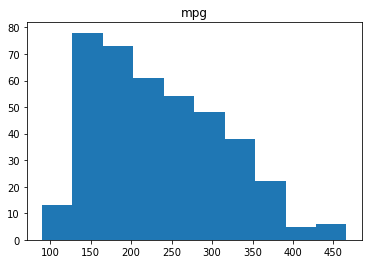

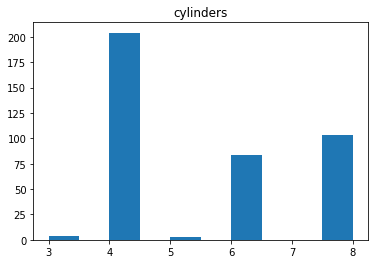

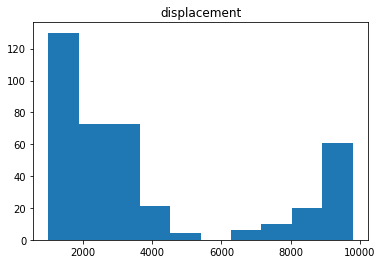

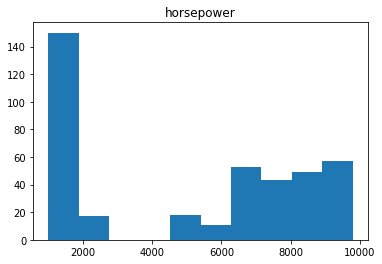

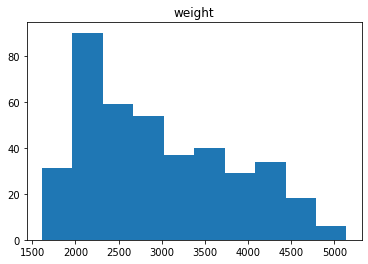

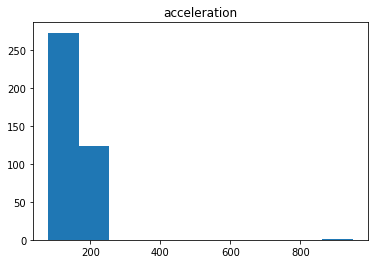

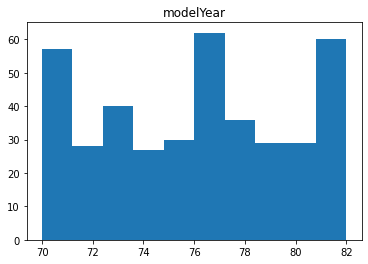

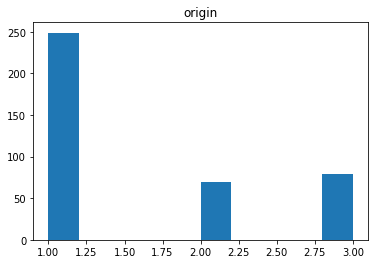

In [22]:
#light explores numeric data
df_num=df_edited.select_dtypes(include='number')

#plot numeric values 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [23]:
# Use pivot table to explore a little deeper
print(pd.pivot_table(df_edited,columns='origin',index='cylinders',values='modelYear',aggfunc='count'))

origin         1     2     3
cylinders                   
3            NaN   NaN   4.0
4           72.0  63.0  69.0
5            NaN   3.0   NaN
6           74.0   4.0   6.0
8          103.0   NaN   NaN


In [24]:
# Count origin and cylinders
print("Origin: \n",df['origin'].value_counts())
print("Cylinders: \n",df['cylinders'].value_counts())

Origin: 
 1    249
3     79
2     70
Name: origin, dtype: int64
Cylinders: 
 4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396      0.402229    0.547326 -0.831741   
cylinders    -0.775396   1.000000     -0.242810   -0.706122  0.896017   
displacement  0.402229  -0.242810      1.000000    0.089973 -0.390173   
horsepower    0.547326  -0.706122      0.089973    1.000000 -0.640970   
weight       -0.831741   0.896017     -0.390173   -0.640970  1.000000   
acceleration  0.196969  -0.221709      0.103425    0.190413 -0.169391   
modelYear     0.579267  -0.348746     -0.006304    0.220668 -0.306564   
origin        0.563450  -0.562543      0.357808    0.351731 -0.581024   

              acceleration  modelYear    origin  
mpg               0.196969   0.579267  0.563450  
cylinders        -0.221709  -0.348746 -0.562543  
displacement      0.103425  -0.006304  0.357808  
horsepower        0.190413   0.220668  0.351731  
weight           -0.169391  -0.306564 -0.581024  
acceleration      1.000000   0.128133  0.0

<AxesSubplot:>

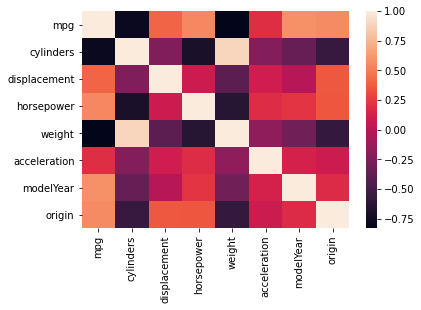

In [25]:
# Find correlations between label and features using heatmap
print(df_edited.corr())
sns.heatmap(df_num.corr())

In [26]:
# Import useful libraries for preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
# Split data into training set and test set
features=df_num.drop(['mpg'],axis=1)
label=df_edited['mpg']
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=42)

# Check data after spliting
print(X_train.shape)
print(X_test.shape)

(318, 7)
(80, 7)


In [28]:
# Standarize training and testing set before using machine learning algorithm
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
# apply linear regression on X_train and y_train
lr=LinearRegression()
lr.fit(X_train, y_train)
print("Coefficent: ",lr.coef_)          # Coefficent
print("Intercept : ",lr.intercept_)     # Intercept or Bias

Coefficent:  [ -2.35159364  11.49911272   1.33079946 -44.40425795   0.53882309
  30.03556826   6.45855531]
Intercept :  236.08176100628936


Text(0, 0.5, 'Y Predictions')

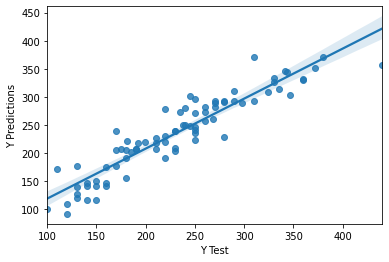

In [30]:
# Predict y_test using X_Test
predictions = lr.predict(X_test)
predictions=np.round(predictions,0)

# Plot regression line
sns.regplot(x=y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Y Predictions')

In [40]:
# Evaluate model using R square score
from sklearn.metrics import r2_score
print(np.round(r2_score(y_test, predictions),2))

0.86


In [39]:
# Calculate MSE Cost Function
cost=(predictions-y_test)**2
cost=(1/(2*80))*cost.values.sum()
print(np.round(cost,1))

369.7
